# System tools to herd the dumps into something useful

In [140]:
%pylab nbagg

import os
import re

from topas2numpy import read_ntuple
from datetime import datetime
from pylab import figure, cm
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


/home/xcite/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Making a new analysis directory

In [141]:
now = datetime.now()

dt_string = now.strftime("%Y-%m-%d-h%Hm%M")

print(dt_string)

os.mkdir(f'analysis/{dt_string}')

2020-09-08-h16m30


## Reformat the dump

In [145]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.phsp
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.header

In [142]:
!echo 'A larger set of floods' > ./analysis/2020-09-08-h16m30/Readme

In [143]:
#!cat energies.txt deposition.txt
#!cat deposition.txt

In [148]:
import glob

<IPython.core.display.Javascript object>


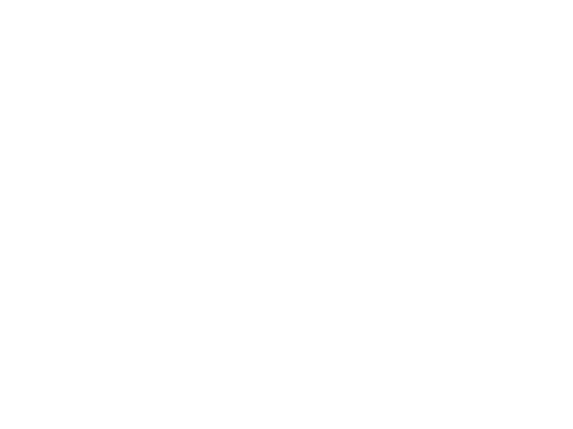

In [166]:
rootdir = "."
regex = re.compile('(.*flood*keV.phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

# xedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,40) # Changed from 82 JO 2020 07
# yedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,40) # Changed from 40 JO 08


edges_forward_x = (np.arange(0.0392,64*0.0782,0.0782))
edges_forward_y = (np.arange(0.0392,256*0.0782,0.0782))


# edges_forward = (np.arange(0.0196,41*0.0392,0.0392))

# edges_forward = (np.arange(0.0168,41*0.0336,0.0336))

# edges_forward = (np.arange(0.001,151*0.002,0.002))

xedges = np.hstack([-1*edges_forward_x[-1::-1], edges_forward_x])
yedges = np.hstack([-1*edges_forward_y[-1::-1], edges_forward_y])

xedges = np.linspace(-5.,5.,129,endpoint=True)
yedges = np.linspace(-20.07,20.07,513,endpoint=True)


# xedges = edges #np.linspace(-2,2,201) # Changed from 82 JO 2020 07
# yedges = edges #np.linspace(-2,2,201) # Changed from 40 JO 08

prim_slices = []
scatter_slices = []
total_slices = []

original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

bin_edges = np.array([0,35,45,55,65,75,85,95,200,400,600,800,950,1500,3000,5000,6000])/1000

speks = []

path_spec = '*flood*-0030keV.phsp'

for file in sorted(glob.glob(path_spec)):


        y = read_ntuple(os.path.join(rootdir,file))
#             xx = [y[kk][0] for kk in range(y.size)]
#             yy = [y[kk][1] for kk in range(y.size)]

        e_kev = int(file[-12:-8])

        y2 = y['Energy [MeV]'] < e_kev/1000 - 0.0005
        y1 = y['Energy [MeV]'] > e_kev/1000 - 0.0005

        h_prim,xs,yx = np.histogram2d(y['Position X [cm]'][y1],y['Position Y [cm]'][y1], bins = [xedges,yedges])
        h,xs,yx = np.histogram2d(y['Position X [cm]'],y['Position Y [cm]'], bins = [xedges,yedges])
#             plt.title(f'{file}')
#             plt.savefig(f'analysis/{dt_string}/{file}.png')
#             plt.axis('image')
#             np.save(f'analysis/{dt_string}/{file}',h)
#             np.save(f'analysis/{dt_string}/{file}_prim',h_prim)
        spek, be = np.histogram(y['Energy [MeV]'][y2],bins = bin_edges)

        speks.append(spek)
        prim_slices.append(np.mean(h_prim,0))
        total_slices.append(np.mean(h,0))
        scatter_slices.append(np.mean(h,0)-np.mean(h_prim,0))
            

<IPython.core.display.Javascript object>


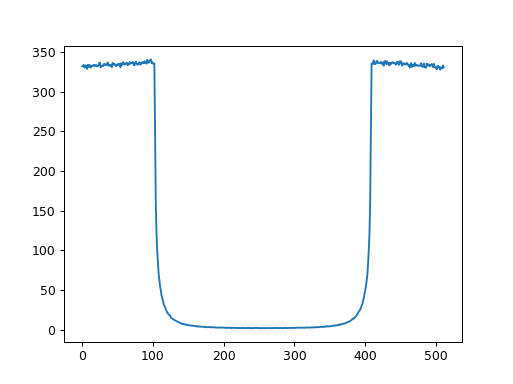

<IPython.core.display.Javascript object>


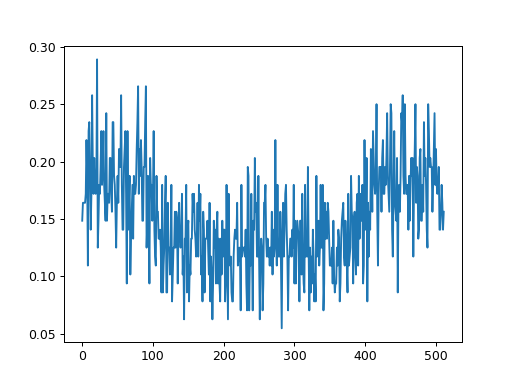

<IPython.core.display.Javascript object>


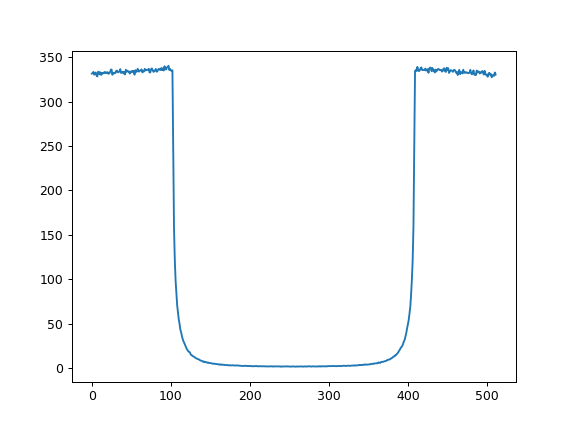

<IPython.core.display.Javascript object>


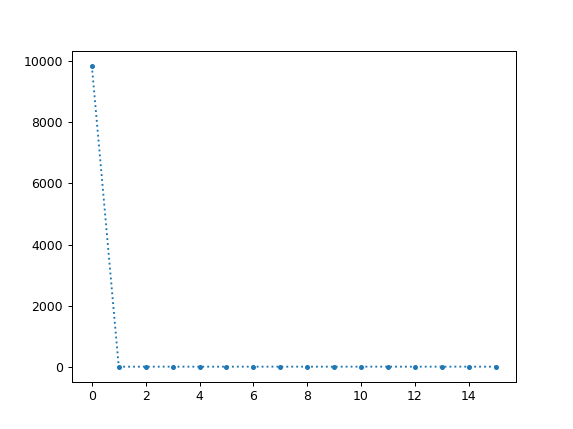

In [163]:
plt.figure()
plt.plot(np.array(total_slices).T)

plt.figure()
plt.plot(np.array(scatter_slices).T)

plt.figure()
plt.plot(np.array(prim_slices).T)

plt.figure()
plt.plot(np.array(speks).T,'.:');

<IPython.core.display.Javascript object>


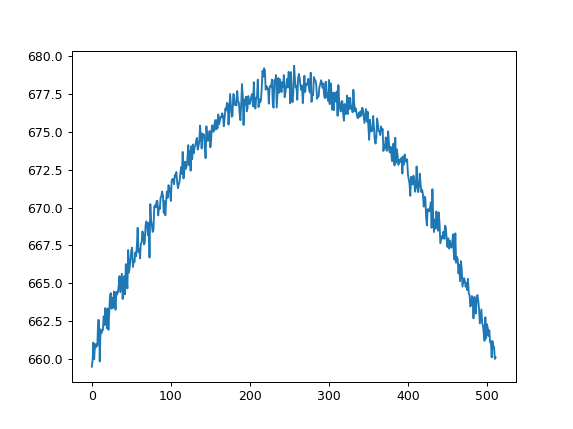

In [158]:
plt.figure()
plt.plot(np.mean(np.array(total_slices).T,1))

In [153]:
np.save('total_flood',np.array(total_slices).T)
np.save('scatter_flood',np.array(scatter_slices).T)
np.save('primary_flood',np.array(prim_slices).T)
np.save('e_dist_flood',np.array(speks).T);

In [154]:
np.array(total_slices).T.shape

(512, 16)

In [139]:
!cp total.npy scatter.npy primary.npy e_dist.npy ../../fastCAT/tests/

In [155]:
!cp total_flood.npy scatter_flood.npy primary_flood.npy e_dist_flood.npy ../../fastCAT/tests/

<IPython.core.display.Javascript object>


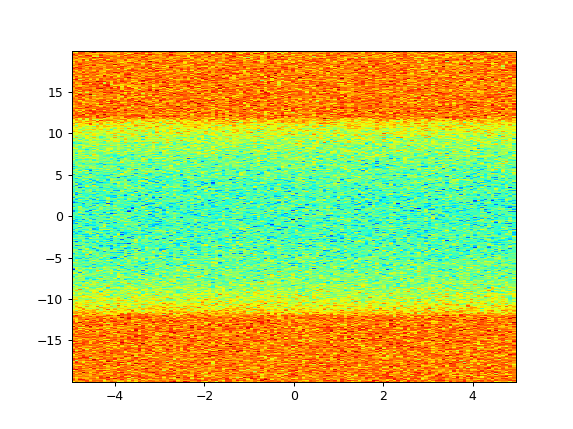

<IPython.core.display.Javascript object>


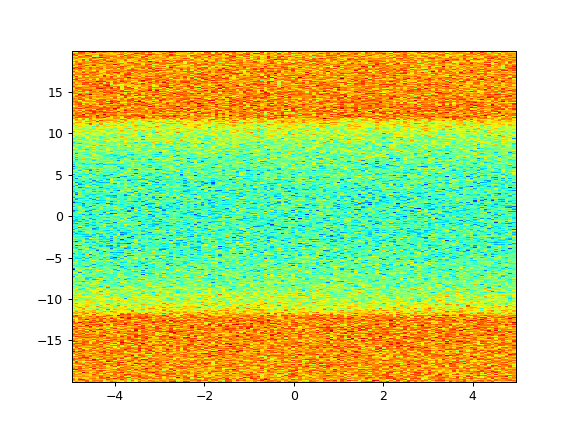

<IPython.core.display.Javascript object>


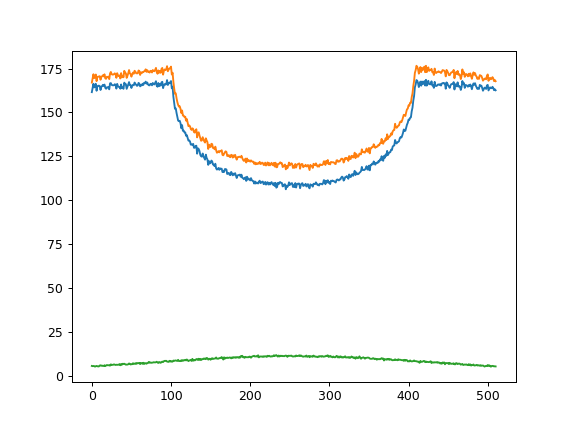

In [58]:
plt.figure()
h,xs,yx,ima = plt.hist2d(y['Position X [cm]'][y1],y['Position Y [cm]'][y1], bins = [xedges,yedges], cmap=cm.jet, norm=LogNorm());

# plt.figure()
# plt.plot(np.mean(h,0))

plt.figure()
h2,xs,yx,ima = plt.hist2d(y['Position X [cm]'],y['Position Y [cm]'], bins = [xedges,yedges], cmap=cm.jet, norm=LogNorm());

plt.figure()
plt.plot(np.mean(h,0))
plt.plot(np.mean(h2,0))
plt.plot(np.mean(h2,0) -np.mean(h,0))


<IPython.core.display.Javascript object>


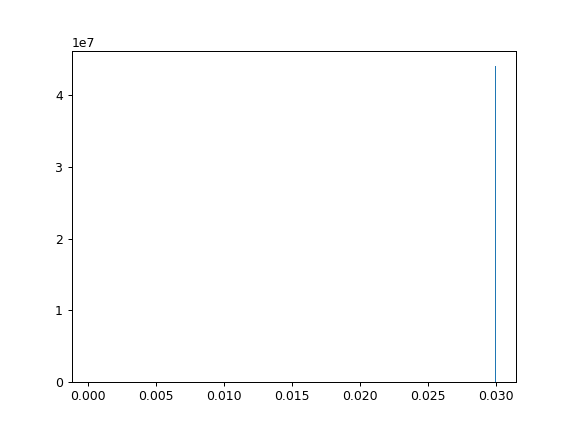

(array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e

In [167]:
plt.figure()
plt.hist(y['Energy [MeV]'],bins=1000)

In [121]:
y4  = y['Energy [MeV]'] < 0.5

<IPython.core.display.Javascript object>


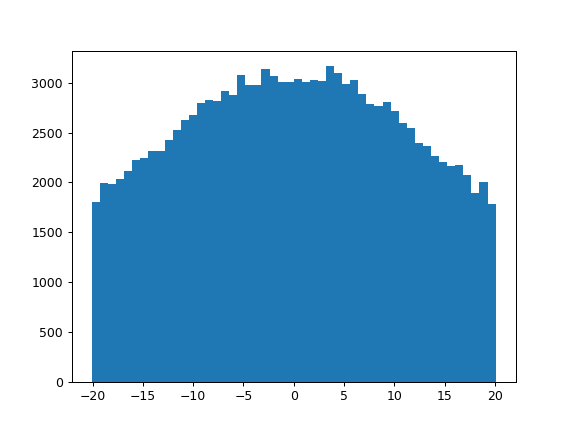

(array([1801., 1992., 1985., 2033., 2116., 2224., 2243., 2311., 2311.,
        2429., 2529., 2623., 2680., 2799., 2830., 2821., 2922., 2875.,
        3078., 2980., 2978., 3140., 3072., 3011., 3010., 3043., 3006.,
        3031., 3018., 3164., 3096., 2992., 3031., 2884., 2792., 2764.,
        2805., 2716., 2593., 2549., 2393., 2369., 2265., 2209., 2161.,
        2173., 2074., 1894., 2003., 1781.]),
 array([-2.0069246e+01, -1.9266481e+01, -1.8463718e+01, -1.7660954e+01,
        -1.6858189e+01, -1.6055424e+01, -1.5252660e+01, -1.4449896e+01,
        -1.3647131e+01, -1.2844367e+01, -1.2041602e+01, -1.1238838e+01,
        -1.0436073e+01, -9.6333094e+00, -8.8305445e+00, -8.0277805e+00,
        -7.2250161e+00, -6.4222517e+00, -5.6194873e+00, -4.8167229e+00,
        -4.0139585e+00, -3.2111940e+00, -2.4084296e+00, -1.6056652e+00,
        -8.0290079e-01, -1.3637543e-04,  8.0262804e-01,  1.6053925e+00,
         2.4081569e+00,  3.2109213e+00,  4.0136857e+00,  4.8164501e+00,
         5.6192145e+00, 

In [122]:
plt.figure()
plt.hist(y['Position Y [cm]'][y4], bins = 50)

# plt.plot(np.mean(h_prim,0))
 #,range=[5.99,6.001]);


In [ ]:
plt.figure()
plt.plot(np.mean())

<IPython.core.display.Javascript object>


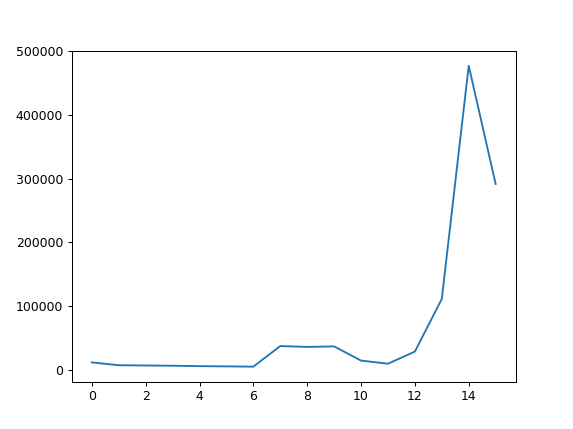

In [104]:
plt.figure()
plt.plot(speks[-1])

<IPython.core.display.Javascript object>


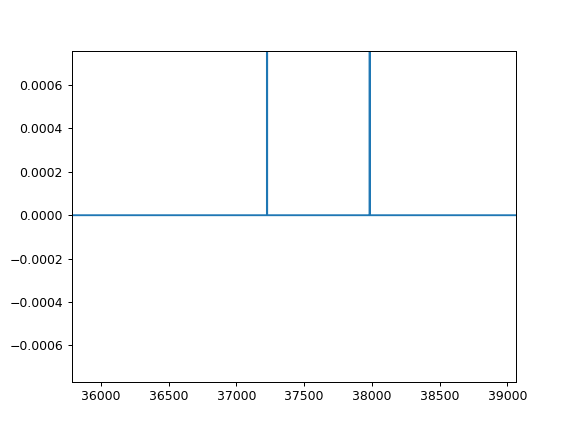

In [9]:
plt.figure()
plt.plot(y['Parent ID'])

In [8]:
y

array([(-0.94335115,  -4.201489 , -49.25, -0.00636613, -0.02781609, 0.10000104, 1., 22,  True,  True, 0),
       (-3.5655282 ,  18.112814 , -49.25, -0.02416137,  0.12004802, 0.10000134, 1., 22,  True,  True, 0),
       ( 4.6425433 ,  16.253872 , -49.25,  0.03108973,  0.10833021, 0.09999935, 1., 22,  True,  True, 0),
       ...,
       ( 3.9256694 ,  15.336057 , -49.25,  0.02658983,  0.10197674, 0.09999999, 1., 22,  True,  True, 0),
       ( 3.2730637 , -14.73152  , -49.25,  0.02180566, -0.09826804, 0.10000044, 1., 22,  True,  True, 0),
       (-1.2880086 ,  -3.1072888, -49.25,  0.10309327, -0.19905594, 0.09895995, 1., 22,  True,  True, 0)],
      dtype=[('Position X [cm]', '<f4'), ('Position Y [cm]', '<f4'), ('Position Z [cm]', '<f4'), ('Direction Cosine X', '<f4'), ('Direction Cosine Y', '<f4'), ('Energy [MeV]', '<f4'), ('Weight', '<f4'), ('Particle Type (in PDG Format)', '<i4'), ('Flag to tell if Third Direction Cosine is Negative (1 means true)', '?'), ('Flag to tell if this is the 

In [25]:
0.0782*64256

5.0048

<IPython.core.display.Javascript object>


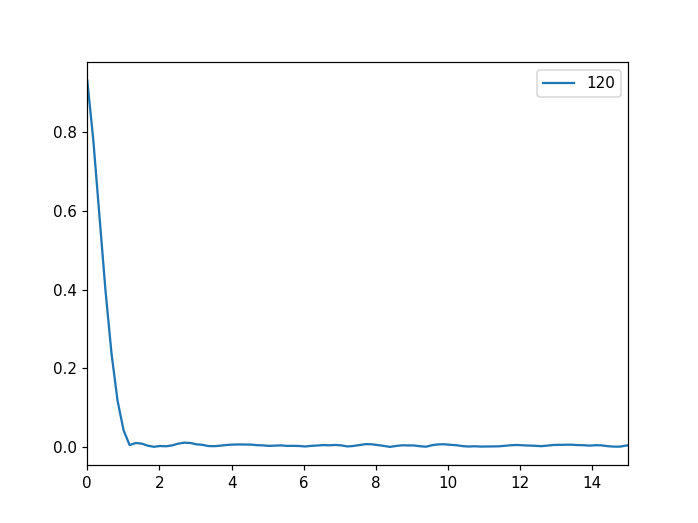

(0.0, 15.0)

In [24]:
# mtf = np.absolute(np.fft.fft(np.convolve(lsf,[0.2]*5)))
# mtf_final = np.fft.fftshift(mtf)

# N = len(mtf)

# T = 0.01

# xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# mm = np.argmax(mtf_final)
# plt.figure()
# plt.plot(mtf_final[mm:]/mtf_final[mm])

mtf = np.absolute(np.fft.fft(lsf))
mtf_final = np.fft.fftshift(mtf)

N = len(mtf)

T = 0.02

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

mm = np.argmax(mtf_final)

plt.figure()
plt.plot(xf,mtf_final[mm+1:]/mtf_final[mm])
plt.legend(['120','6000'])
plt.xlim([0,15])

# mtf = np.absolute(np.fft.fft(lsf2))
# mtf_final = np.fft.fftshift(mtf)

# N = len(mtf)

# T = 0.0336

# xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# mm = np.argmax(mtf_final)

# # plt.figure()
# plt.plot(xf,mtf_final[mm+1:]/mtf_final[mm])
# plt.legend(['120','6000'])
# plt.xlim([0,15])

In [49]:
len(xf[:mm+1])

150

In [51]:
len(xf)

150

<IPython.core.display.Javascript object>


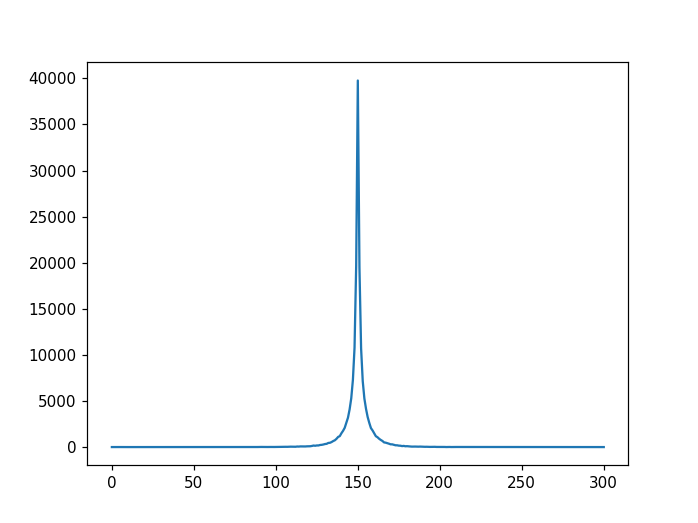

In [67]:
plt.figure()
plt.plot(h[150,:])
# plt.plot(h[41,:])
# plt.plot(h[42,:])

In [ ]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("analysis/2020-06-03-h14m33/*.png"))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [10]:
!cat ~/anaconda3/lib/python3.7/site-packages/topas2numpy/ntuple.py

# -*- coding: utf-8 -*-

# system imports
import re
import os.path

# third-party imports
import numpy as np

re_uint = '\d+'
re_str = '[\S+ \t]+'

binary_old_int_columns = [
    'Particle Type (in PDG Format)',
    'Run ID',
    'Event ID',
    'Track ID',
    'Parent ID',
    'Seed Part 1',
    'Seed Part 2',
    'Seed Part 3',
    'Seed Part 4',
]

limited_col_names = [
    ('Particle Type (sign from z direction)', np.int8),
    ('Energy (MeV) (-ve if new history)', 'f'),
    ('Position X (cm)', 'f'),
    ('Position Y (cm)', 'f'),
    ('Position Z (cm)', 'f'),
    ('Direction Cosine X', 'f'),
    ('Direction Cosine Y', 'f'),
    ('Weight', 'f'),
]


def read_ntuple(filepath):
    root, ext = os.path.splitext(filepath)
    ntuple_path = root + '.phsp'
    header_path = root + '.header'

    file_format, col_names = _sniff_format(header_path)

    if file_format == 'ascii':
        # preserve column names => cannot be viewed as a np.recarray
        # http://docs.scipy.org/doc/numpy-1

In [11]:
file

'PhotodiodeSurface_keV_6000.phsp'

In [12]:
!pwd

/home/xcite/topas/scintillators/Cu-GOS/runs


In [13]:
68372568/2848857

24.0

In [14]:
150398688/6266612

24.0

In [15]:
7437024/24

309876.0

In [36]:
xedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,41)

(max(xedges) - min(xedges))/40

0.0784

In [34]:
0.25*0.784

0.196